Author : G Giridharan

GRIP @ The Sparks Foundation

Data Science and Business Analytics Intern

Batch : September, 2023

Task 1 : Prediction using Supervised Machine Learning

Predicting the percentage of marks that a student is expected to score based upon the number of hours studied using linear regression

## Importing the required python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Step 1 - Loading the Dataset

In [2]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data import successful")

s_data.head(10)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
s_data.shape

(25, 2)

In [7]:
## Exploratory Data Analysis
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
## Check for missing values
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
## Check for Duplicates
s_data.duplicated().sum()

0

## Step 2 - Data Visualisation

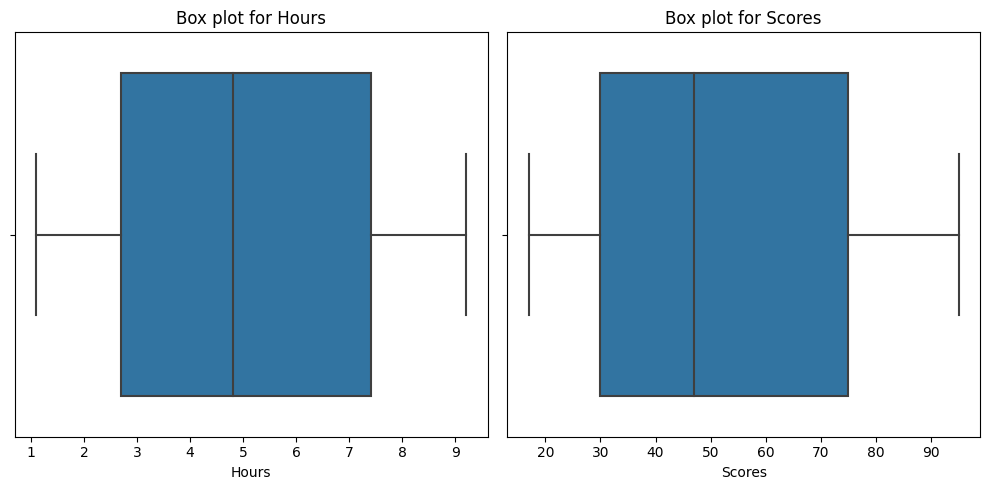

In [10]:
# Box plot for 'Hours' and 'Scores' columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=s_data['Hours'])
plt.xlabel('Hours')
plt.title('Box plot for Hours')

plt.subplot(1, 2, 2)
sns.boxplot(x=s_data['Scores'])
plt.xlabel('Scores')
plt.title('Box plot for Scores')

plt.tight_layout()
plt.show()

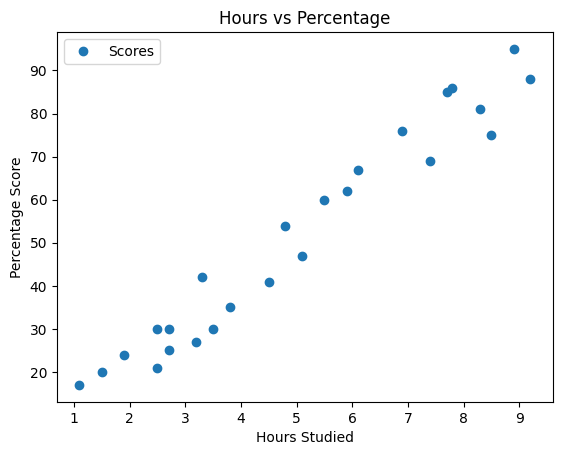

In [12]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

## Step 3 - Data Preprocessing
This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [38]:
## Split Data into Training and Testing Sets

In [13]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4 - Model Training

Splitting the data into training and testing sets, and training the algorithm.

In [41]:
## Linear Regression Model

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


## Step 5 - Plotting the Line of regression

Now since our model is trained now, its the time to visualize the best-fit line of regression.

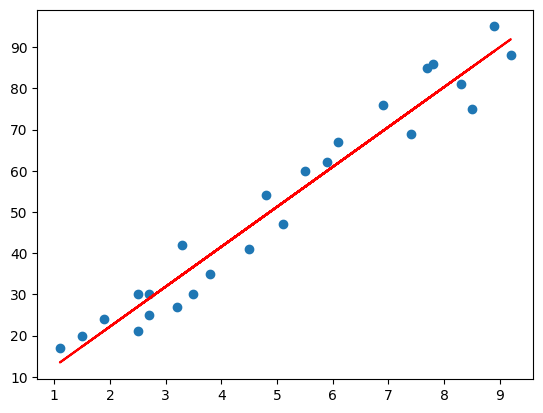

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

## Step 6 - Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [17]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


## Step 7 - Comparing Actual result to the Predicted Model result

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [19]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364416
Test Score: 0.9678055545167994


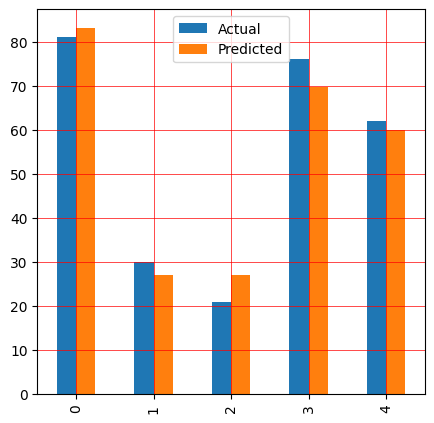

In [20]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [21]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


## Step 8 - Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

Conclusion

I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.


Thank You